# Introdução #

Análise de dados alguns dos principais modelos de notebooks do mercado e de marcas famosas.

Essas análises visam comparar os preços das principais empresas de computadores, e ver quais os aspectos mais importantes que influenciam em seu preço

#### Algumas das analises que serão feitas. ###

1 - Olhar a média, moda e mediana do preço dos notebooks e verificar a sua distribuição em gráficos.

2 - Explorar a correlação entre o preço do notebook e suas especificações, como processador, memória RAM, capacidade de armazenamento, tamanho da tela, etc. Usar de técnicas estatísticas como correlação de Pearson ou Spearman para quantificar essas relações.

3- Separar o Tipo do notebook (Gaming, Ultrabook) e verificar a média dos preços nesses caso mais especificos.


## Carregando Bibliotecas

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os Dados 

In [69]:
df = pd.read_csv('/Kaggle/laptop_price.csv', encoding='latin-1', sep= ',')

In [71]:
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [74]:
df.shape

(1303, 13)

In [78]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


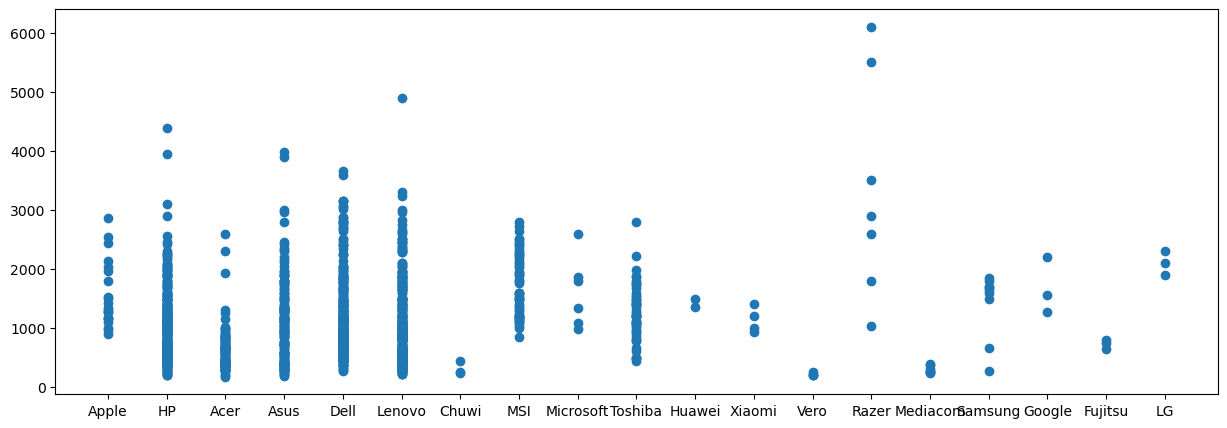

In [72]:
plt.figure(figsize=(15,5))
plt.scatter(data=df, x='Company', y='Price_euros')

plt.show()

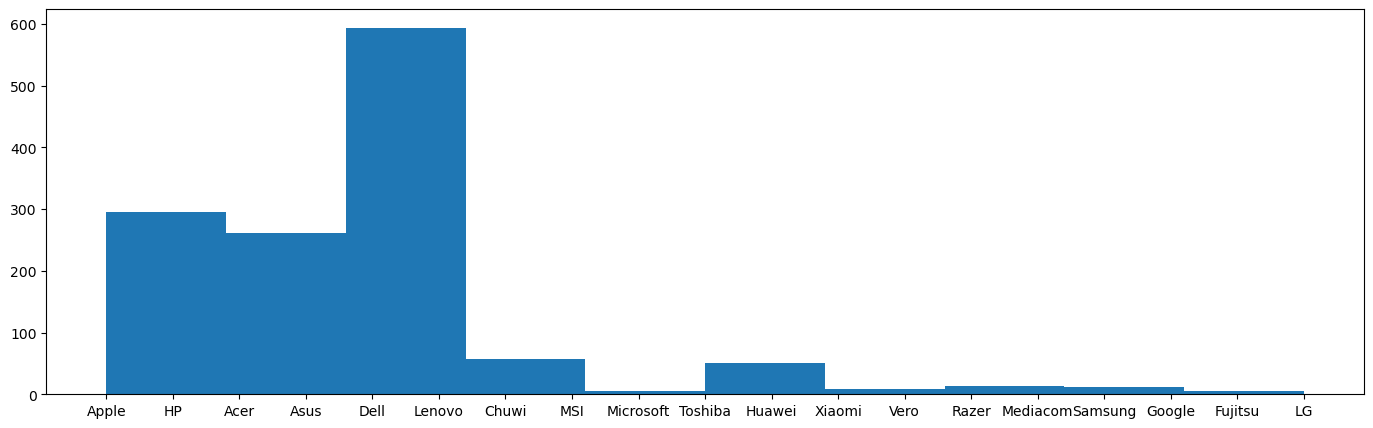

In [39]:
plt.figure(figsize=(17,5))
plt.hist(data=df, x='Company')

plt.show()

In [96]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [28]:
def limpar_dataset(df):
    df = df.drop_duplicates()
    
    # Remover linhas com valores ausentesS
    df = df.dropna()
    
    return df

In [24]:
df_clean = limpar_dataset(df)

In [26]:
df_clean.shape

(1303, 13)

In [33]:
df_cleaned = df_clean.copy().drop(['laptop_ID'], axis=1)

In [58]:
df_cleaned.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

# TOP 10 MOST EXPENSIVE LAPTOPS #

In [62]:
df_sorted = df_cleaned.sort_values(by='Price_euros', ascending=False)

In [64]:
top_10_notebooks = df_sorted.head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

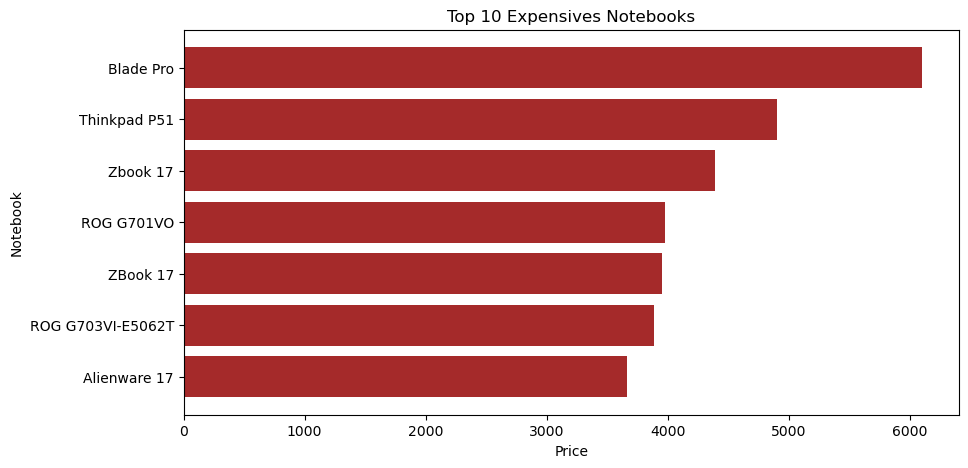

In [89]:
plt.figure(figsize=(10,5))
plt.barh(top_10_notebooks["Product"],top_10_notebooks["Price_euros"], color="brown")
plt.xlabel("Price")
plt.ylabel("Notebook")
plt.title("Top 10 Expensives Notebooks")
plt.gca().invert_yaxis()
plt.show

In [97]:
print(top_10_notebooks['Product'].nunique())

7
